### Cable Surfing Neural Network ###

Use a Keras utility function to load the dataset.

In [ ]:
import numpy as np
from tensorflow import keras
from google.colab import drive
import os

from pprint import pprint

from keras.utils import get_file
from keras.utils import image_dataset_from_directory
from keras.models import Sequential
from keras.layers import *
from keras.models import Model

np.random.seed(444)
tf.random.set_seed(444)

drive.mount('/content/gdrive')


Mounted at /content/gdrive


Define constants
(Luis Data)

In [ ]:

TRAIN_PATH = '/content/gdrive/MyDrive/sp/train_data/l/'
TEST_PATH = '/content/gdrive/MyDrive/sp/test_data/l/'

TRAIN_SIZE = 56
VOLT_LEN = 121227

TEST_SIZE = 11

Define constants
(Nathan Data)

In [ ]:
TRAIN_PATH = '/content/gdrive/MyDrive/sp/train_data/n/'
TEST_PATH = '/content/gdrive/MyDrive/sp/test_data/n/'

TRAIN_SIZE = 200
VOLT_LEN = 21721

TEST_SIZE = 51

Both data

In [ ]:
TRAIN_PATH = '/content/gdrive/MyDrive/sp/train_data/both/'
TEST_PATH = '/content/gdrive/MyDrive/sp/test_data/both/'

TRAIN_SIZE = 293
VOLT_LEN = 121227

TEST_SIZE = 67

Read data from the files: **TRAIN**

Add more preprocessing, crop to the first impulse

In [ ]:
trace_num = 0
x_train = np.zeros((TRAIN_SIZE, VOLT_LEN))
y_train = np.zeros(TRAIN_SIZE)

for volt_trace in os.listdir(TRAIN_PATH):
  with open(TRAIN_PATH + volt_trace,'r') as f:
    data = f.readlines()
  data = np.array([list(map(float, x.strip().split())) for x in data])
  for i in range(len(data)):
    if i == 0:
      continue
    x_train[trace_num][i - 1] = float(data[i][1])
  y_train[trace_num] = data[0][0]
  trace_num += 1

x_train = np.array(x_train)
x_train, y_train

<ipython-input-3-e6fe5d7f3afe>:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([list(map(float, x.strip().split())) for x in data])


(array([[0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
        [0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
        [0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
        ...,
        [0.32799, 0.71722, 0.2611 , ..., 0.     , 0.     , 0.     ],
        [0.32234, 0.34007, 0.37392, ..., 0.     , 0.     , 0.     ],
        [0.34249, 0.24498, 0.26835, ..., 0.     , 0.     , 0.     ]]),
 array([9380., 9380., 9380., 9380., 9380., 9380., 9380., 9380., 9380.,
        8630., 8630., 8630., 8630., 8630., 8630., 8630., 8630., 8630.,
        8315., 8315., 8330., 8330., 8315., 8330., 8052., 8315., 8330.,
        8052., 8052., 7951., 7951., 7951., 8052., 7951., 6953., 7643.,
        7621., 6953., 7621., 7621., 7643., 7621., 7643., 7643., 6953.,
        6920., 6920., 6953., 6920., 6920., 6519., 6519., 6696., 6696.,
        6696., 6696., 6519., 6519., 6519., 6519., 6519., 6137., 6519.,
        6137., 6137., 6137., 6519., 5600., 5600., 5600., 6065., 5600.,
   

Read data from the files: **TEST**

In [ ]:
trace_num = 0
x_test = np.zeros((TEST_SIZE, VOLT_LEN))
y_test = np.zeros(TEST_SIZE)

for volt_trace in os.listdir(TEST_PATH):
  with open(TEST_PATH + volt_trace,'r') as f:
    data = f.readlines()
  data = np.array([list(map(float, x.strip().split())) for x in data])
  for i in range(len(data)):
    if i == 0:
      continue
    x_test[trace_num][i - 1] = float(data[i][1])
  y_test[trace_num] = data[0][0]
  trace_num += 1

x_test = np.array(x_test)
x_test, y_test

<ipython-input-4-f887ed1f8550>:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([list(map(float, x.strip().split())) for x in data])


(array([[0.31026, 0.21919, 0.24579, ..., 0.     , 0.     , 0.     ],
        [0.63099, 1.18623, 0.58183, ..., 0.     , 0.     , 0.     ],
        [0.24982, 0.50527, 0.42711, ..., 0.     , 0.     , 0.     ],
        ...,
        [0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
        [0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
        [0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ]]),
 array([1291.,  842., 1149.,  467.,  559.,  397.,  714., 1234., 1375.,
         782., 1421., 3015., 2546., 2615., 2952., 3379., 2152., 3057.,
        2512., 3691., 3888., 6008., 5837., 4403., 4100., 4072., 3846.,
        3875., 4589., 5789., 6751., 6638., 6612., 8378., 6098., 6082.,
        8317., 7293., 6638., 6431., 9624., 4574., 1187., 2542., 1705.,
        8839., 2797., 8902., 9214., 9038., 7621., 6519., 5600., 6920.,
        5549., 6953., 6065., 6137., 5446., 6696., 9380., 7951., 8330.,
        8630., 8315., 7643., 8052.]))

Prep data for alt model

In [ ]:
y_temp = np.zeros((TRAIN_SIZE, 4))
for i in range(len(y_train)):
  temp = list(str(int(y_train[i])))
  if len(temp) == 3:
    temp = [0] + temp
  elif len(temp) == 2:
    temp = [0, 0] + temp
  elif len(temp) == 1:
    temp = [0, 0, 0] + temp
  y_temp[i] = temp
  for j in range(len(y_temp[i])):
    y_temp[i][j] = int(y_temp[i][j])
y_train = y_temp

y_temp = np.zeros((TEST_SIZE, 4))
for i in range(len(y_test)):
  temp = list(str(int(y_test[i])))
  if len(temp) == 3:
    temp = [0] + temp
  elif len(temp) == 2:
    temp = [0, 0] + temp
  elif len(temp) == 1:
    temp = [0, 0, 0] + temp
  y_temp[i] = temp
  for j in range(len(y_temp[i])):
    y_temp[i][j] = int(y_temp[i][j])
y_test = y_temp

y_train, y_test

(array([[9., 3., 8., 0.],
        [9., 3., 8., 0.],
        [9., 3., 8., 0.],
        ...,
        [0., 3., 9., 7.],
        [0., 3., 9., 7.],
        [0., 3., 9., 7.]]),
 array([[1., 2., 9., 1.],
        [0., 8., 4., 2.],
        [1., 1., 4., 9.],
        [0., 4., 6., 7.],
        [0., 5., 5., 9.],
        [0., 3., 9., 7.],
        [0., 7., 1., 4.],
        [1., 2., 3., 4.],
        [1., 3., 7., 5.],
        [0., 7., 8., 2.],
        [1., 4., 2., 1.],
        [3., 0., 1., 5.],
        [2., 5., 4., 6.],
        [2., 6., 1., 5.],
        [2., 9., 5., 2.],
        [3., 3., 7., 9.],
        [2., 1., 5., 2.],
        [3., 0., 5., 7.],
        [2., 5., 1., 2.],
        [3., 6., 9., 1.],
        [3., 8., 8., 8.],
        [6., 0., 0., 8.],
        [5., 8., 3., 7.],
        [4., 4., 0., 3.],
        [4., 1., 0., 0.],
        [4., 0., 7., 2.],
        [3., 8., 4., 6.],
        [3., 8., 7., 5.],
        [4., 5., 8., 9.],
        [5., 7., 8., 9.],
        [6., 7., 5., 1.],
        [6., 6., 3., 8.

In [ ]:
y_1 = np.zeros(TRAIN_SIZE)
y_2 = np.zeros(TRAIN_SIZE)
y_3 = np.zeros(TRAIN_SIZE)
y_4 = np.zeros(TRAIN_SIZE)
for i in range(TRAIN_SIZE):
  y_1[i] = y_train[i][0]
  y_2[i] = y_train[i][1]
  y_3[i] = y_train[i][2]
  y_4[i] = y_train[i][3]

y_train = [y_1, y_2, y_3, y_4]

y_1 = np.zeros(TEST_SIZE)
y_2 = np.zeros(TEST_SIZE)
y_3 = np.zeros(TEST_SIZE)
y_4 = np.zeros(TEST_SIZE)
for i in range(TEST_SIZE):
  y_1[i] = y_test[i][0]
  y_2[i] = y_test[i][1]
  y_3[i] = y_test[i][2]
  y_4[i] = y_test[i][3]

y_test = [y_1, y_2, y_3, y_4]
y_train, y_test

([array([9., 9., 9., 9., 9., 9., 9., 9., 9., 8., 8., 8., 8., 8., 8., 8., 8.,
         8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 7., 7., 7., 8., 7.,
         6., 7., 7., 6., 7., 7., 7., 7., 7., 7., 6., 6., 6., 6., 6., 6., 6.,
         6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 5.,
         5., 5., 6., 5., 5., 5., 6., 6., 6., 5., 5., 5., 5., 5., 5., 5., 5.,
         4., 5., 5., 5., 5., 5., 5., 5., 4., 4., 4., 4., 4., 4., 4., 4., 1.,
         2., 2., 2., 2., 1., 2., 2., 2., 2., 1., 1., 1., 1., 1., 1., 9., 9.,
         9., 9., 9., 9., 9., 9., 9., 9., 8., 8., 9., 9., 8., 8., 8., 8., 8.,
         8., 8., 8., 8., 8., 8., 8., 8., 7., 7., 7., 8., 7., 6., 6., 6., 6.,
         6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
         6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 5., 5., 5., 5., 4., 5.,
         4., 5., 5., 5., 4., 4., 4., 4., 4., 4., 4., 4., 3., 3., 4., 4., 4.,
         4., 4., 4., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,

Show some graphs of the data

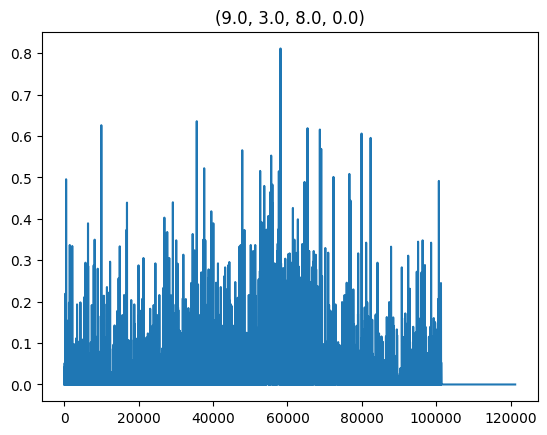

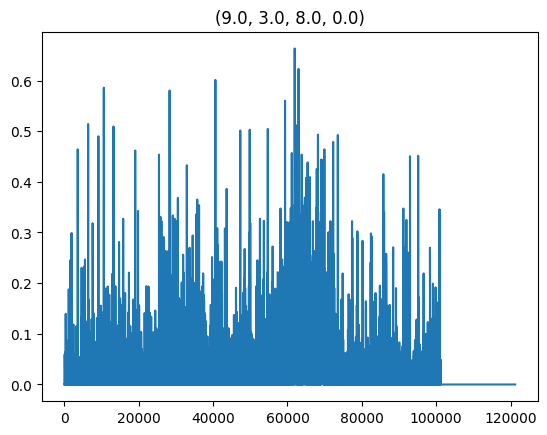

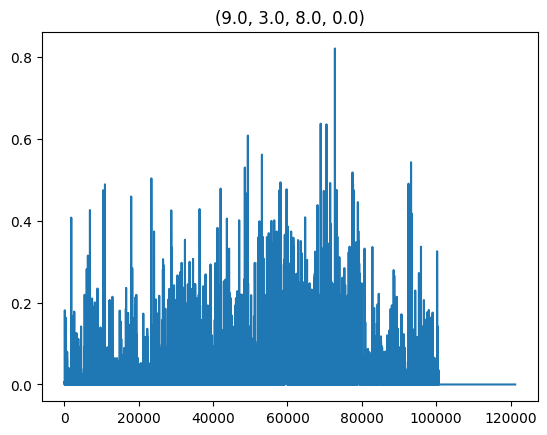

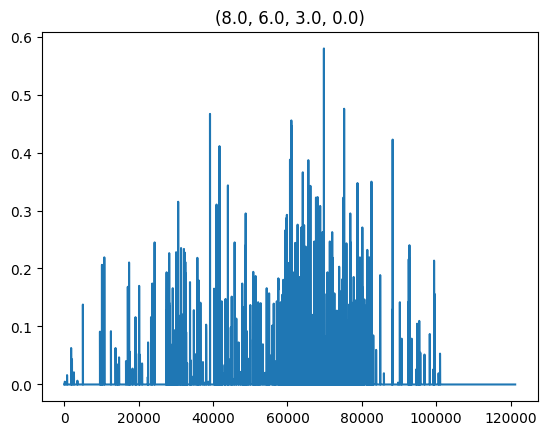

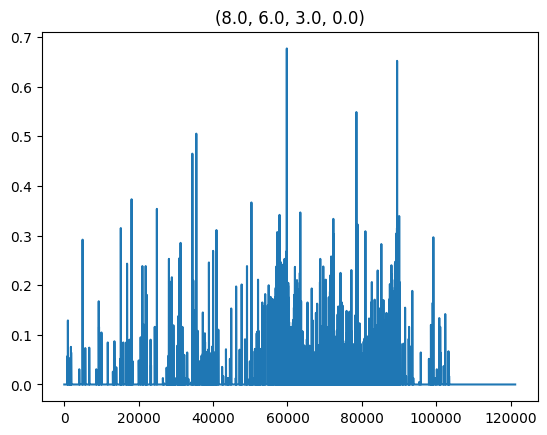

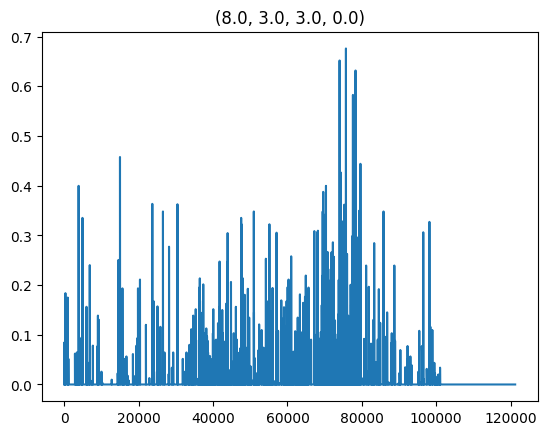

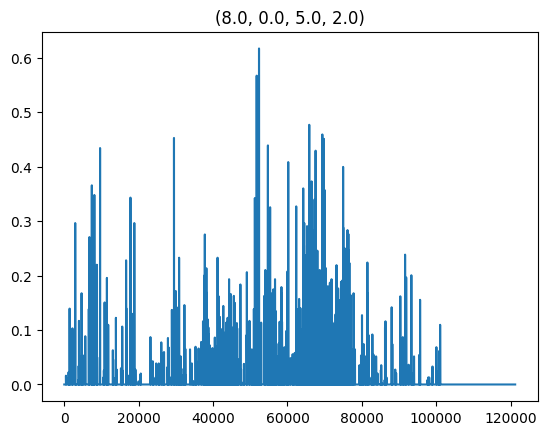

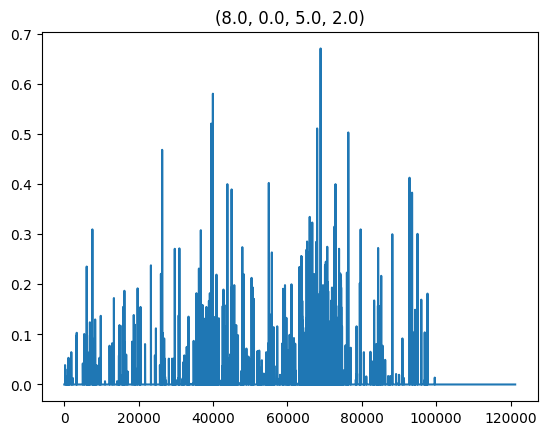

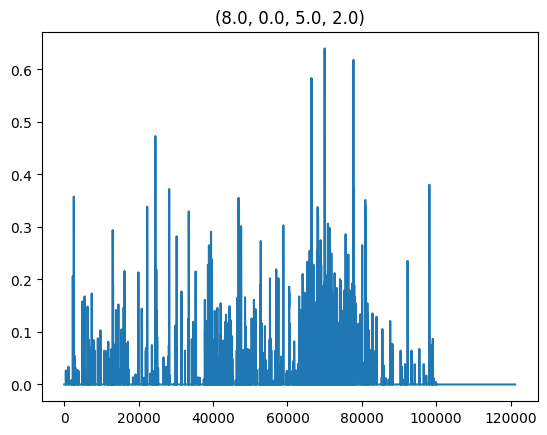

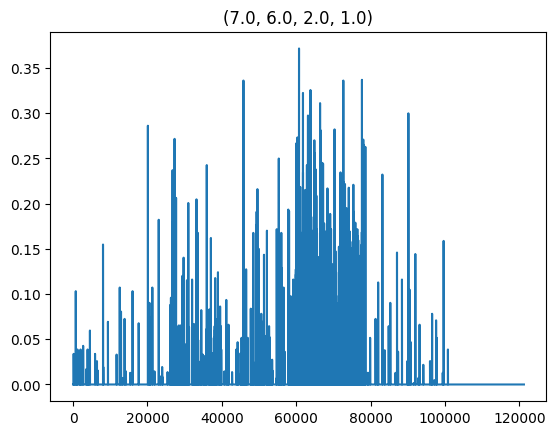

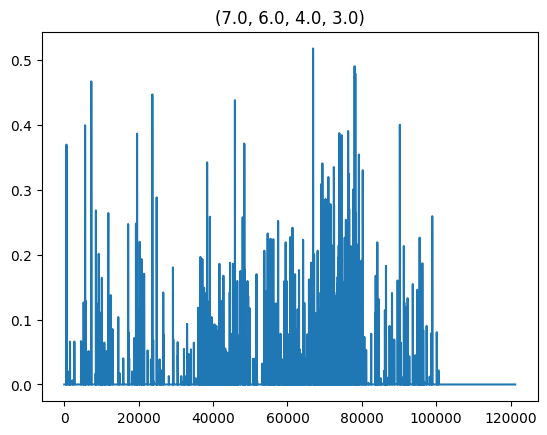

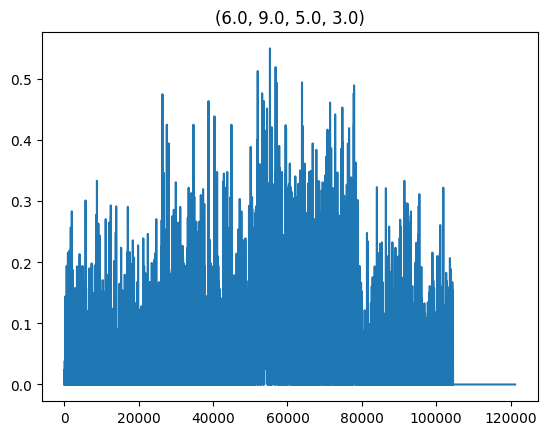

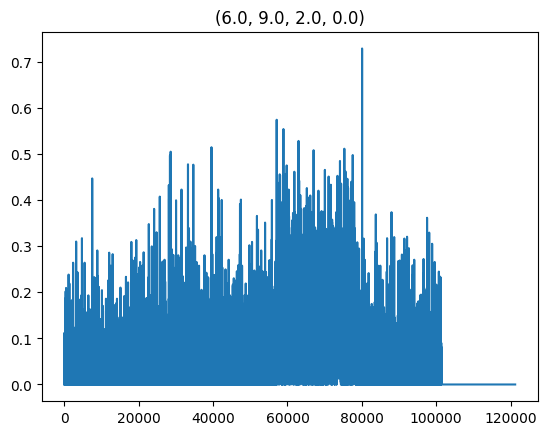

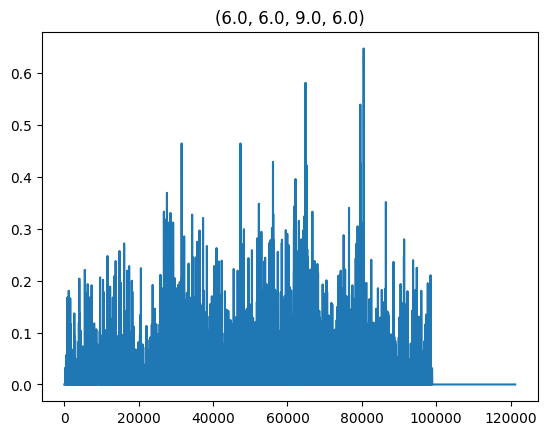

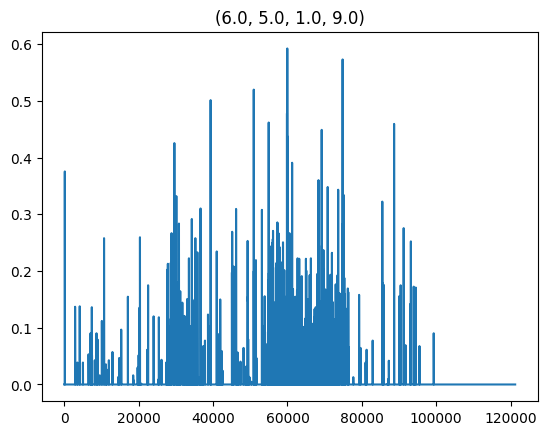

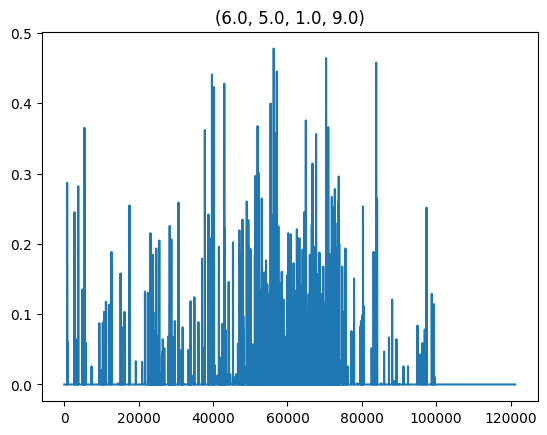

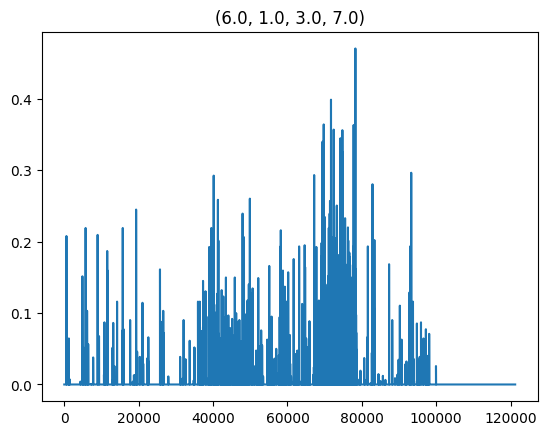

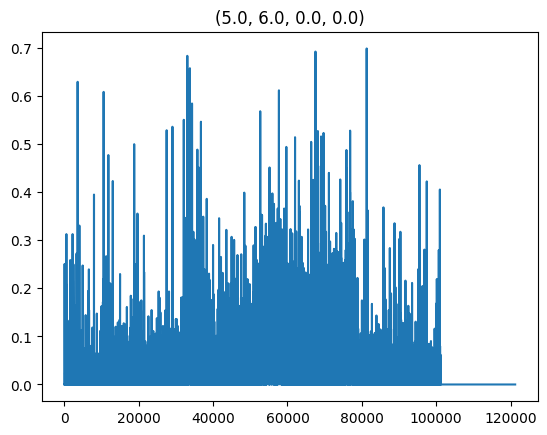

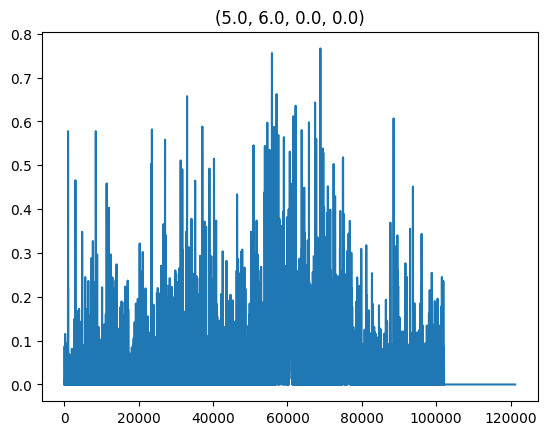

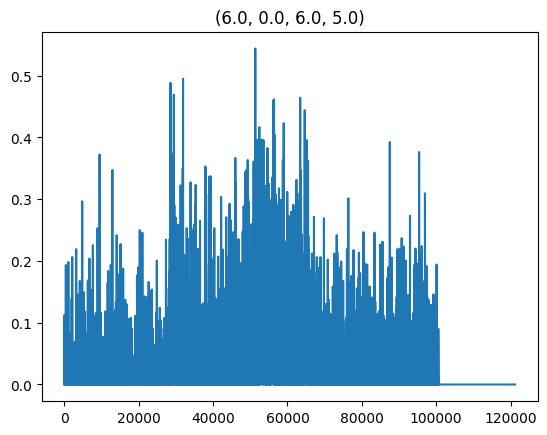

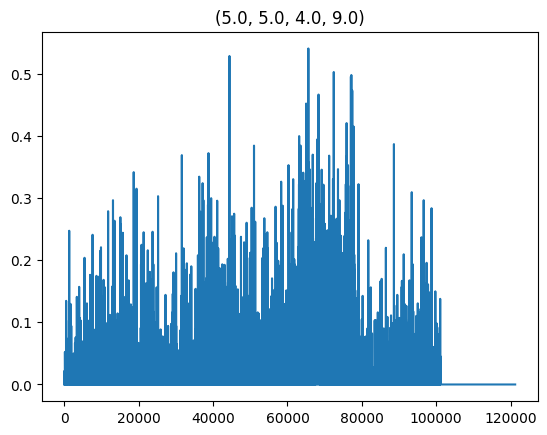

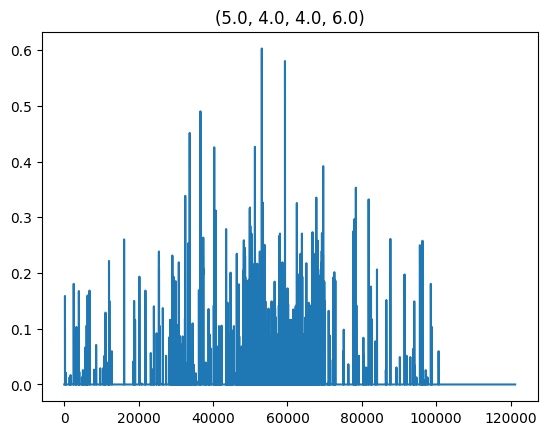

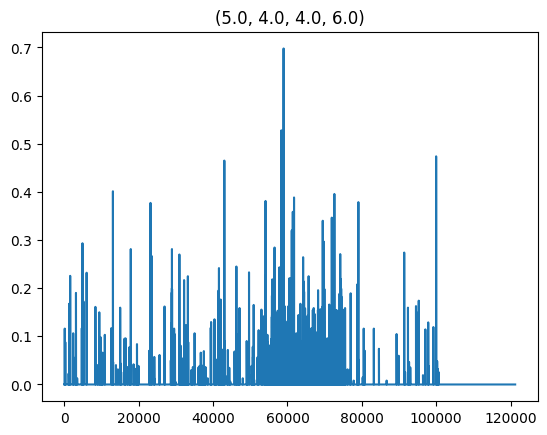

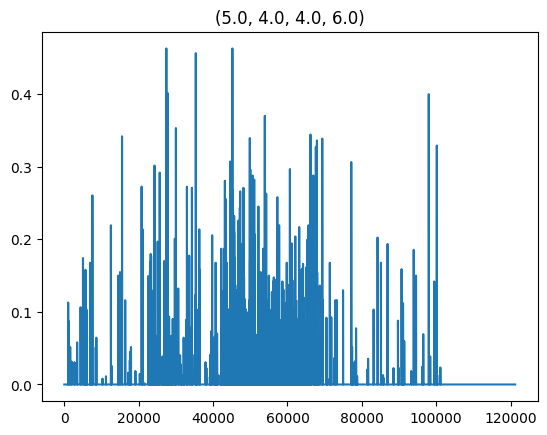

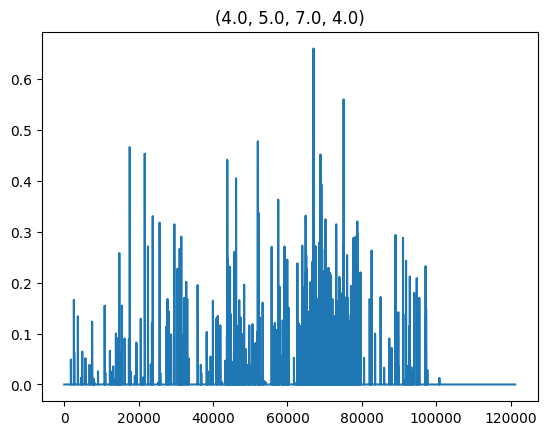

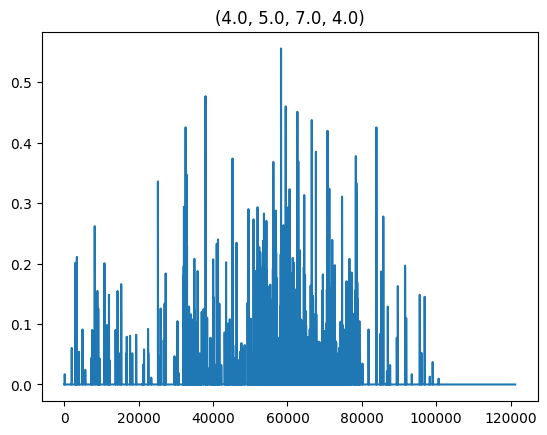

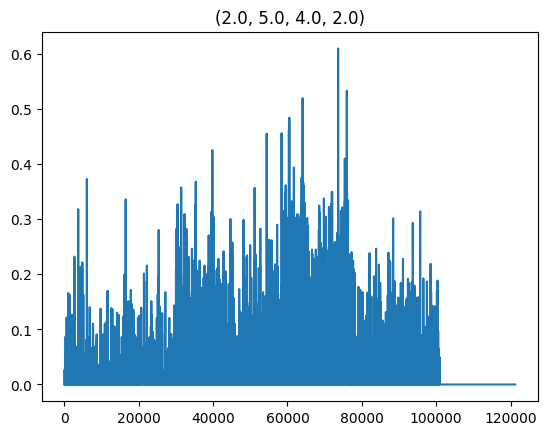

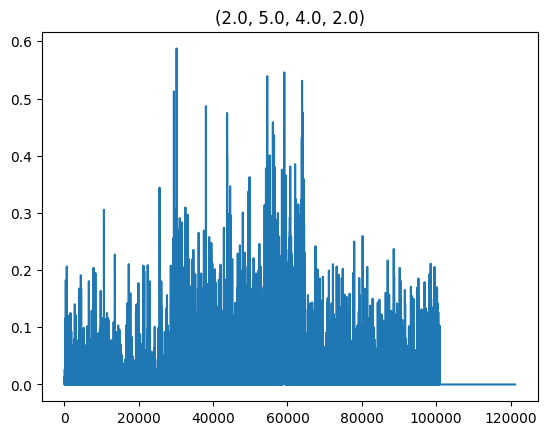

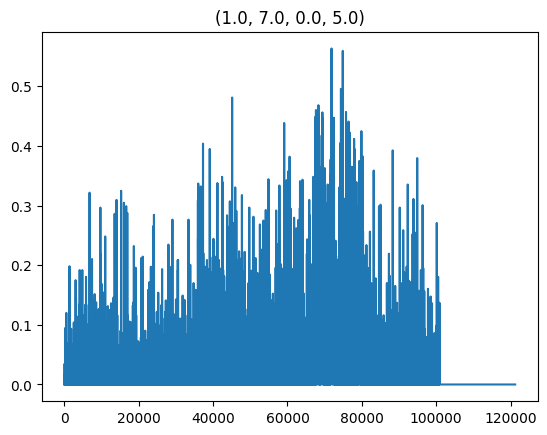

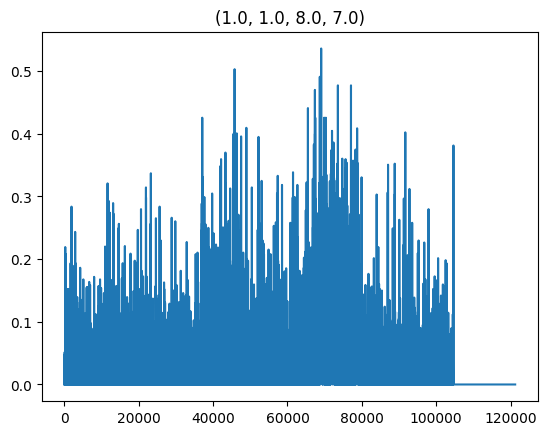

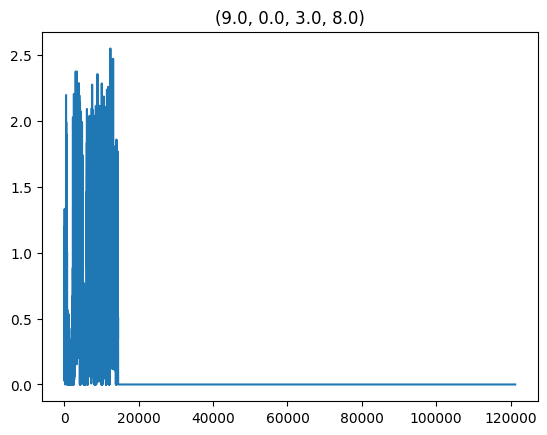

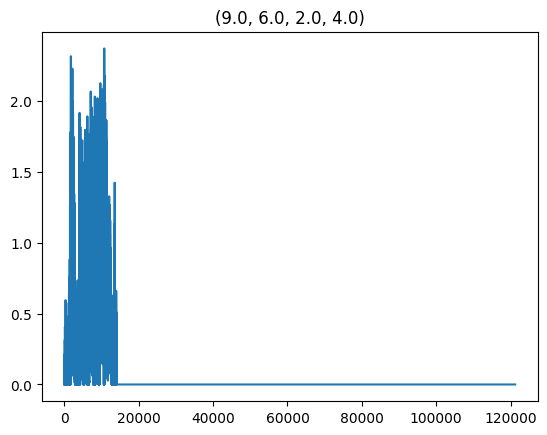

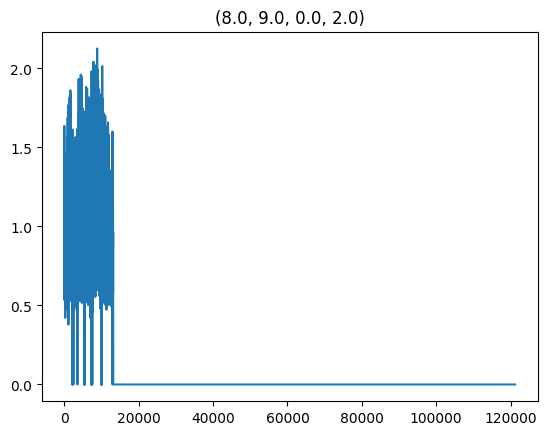

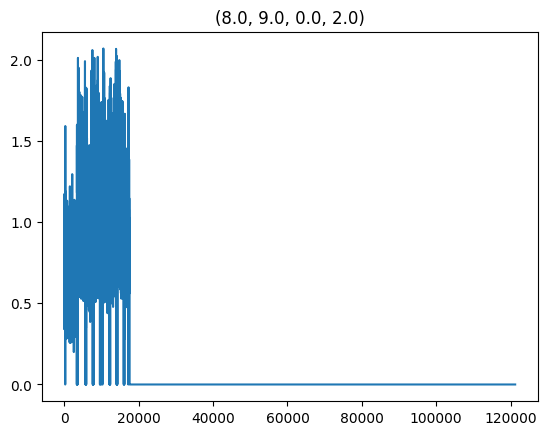

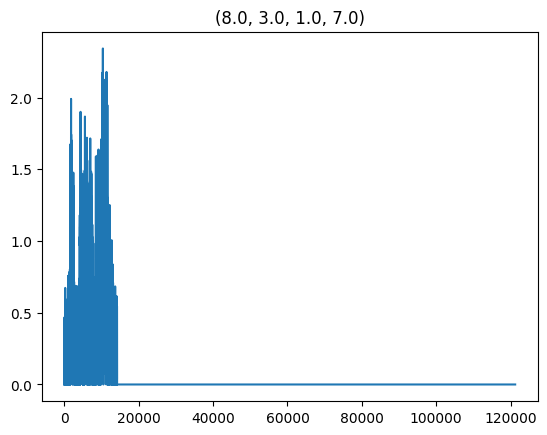

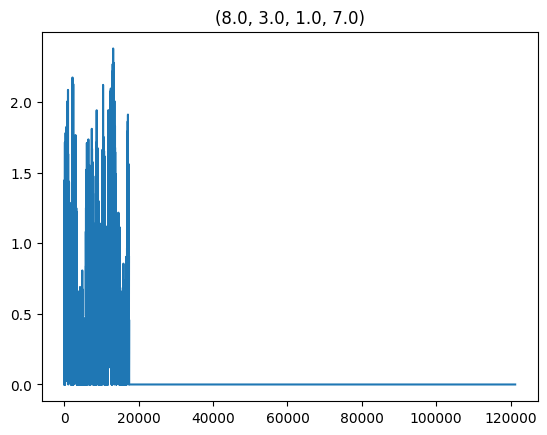

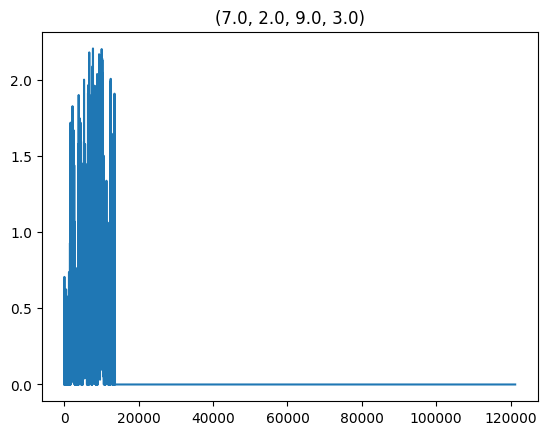

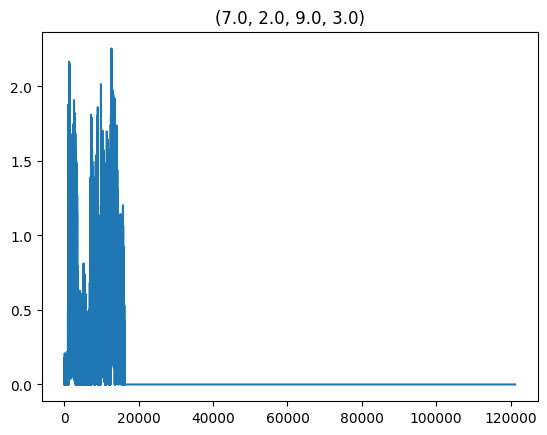

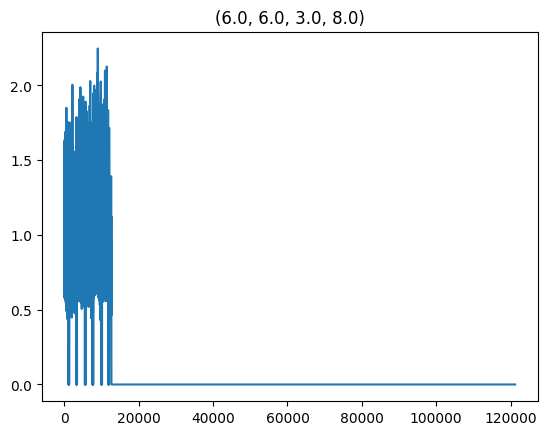

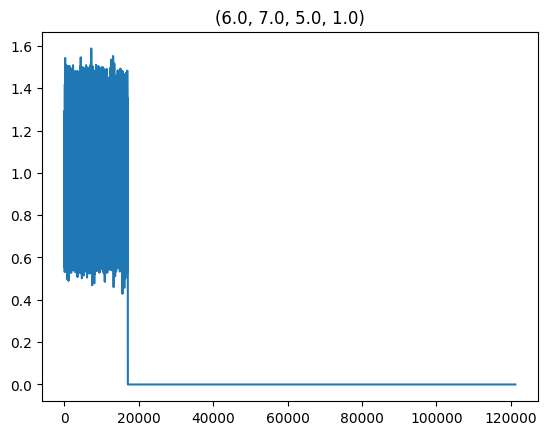

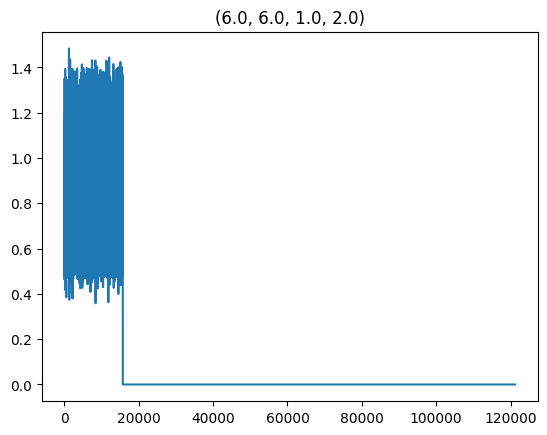

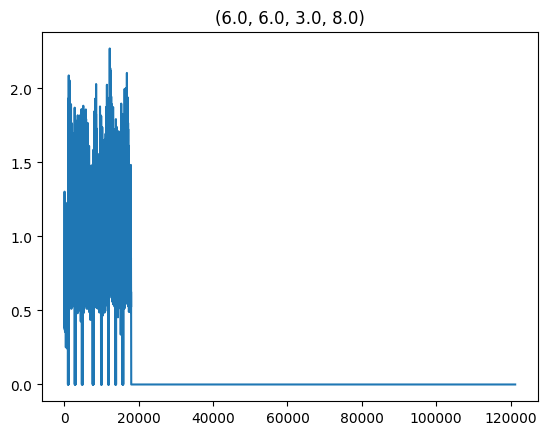

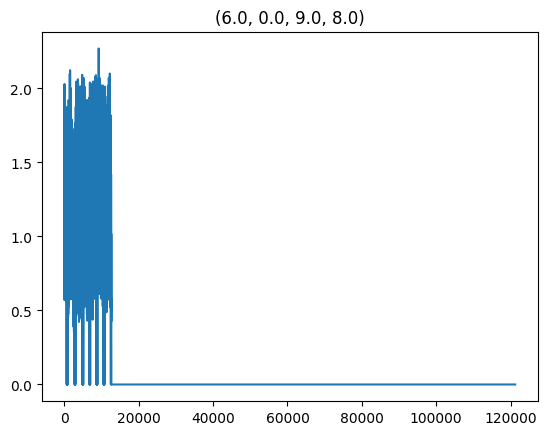

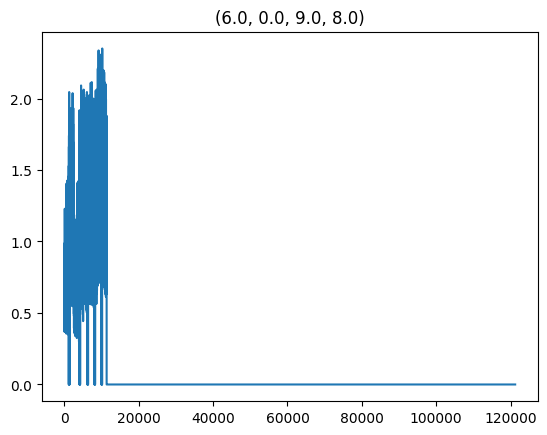

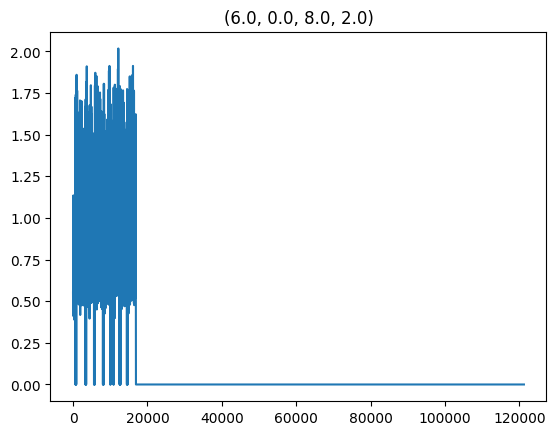

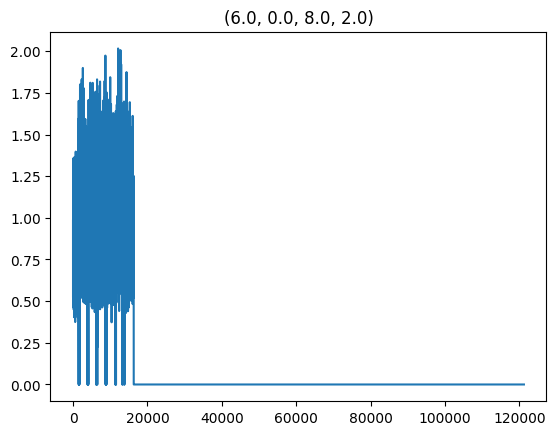

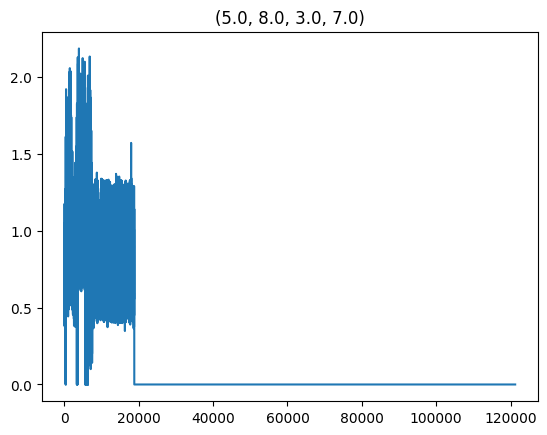

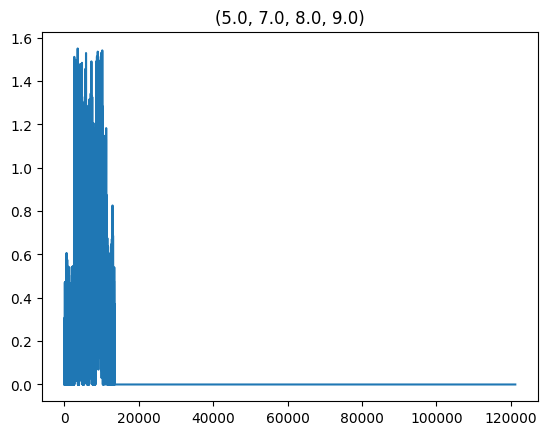

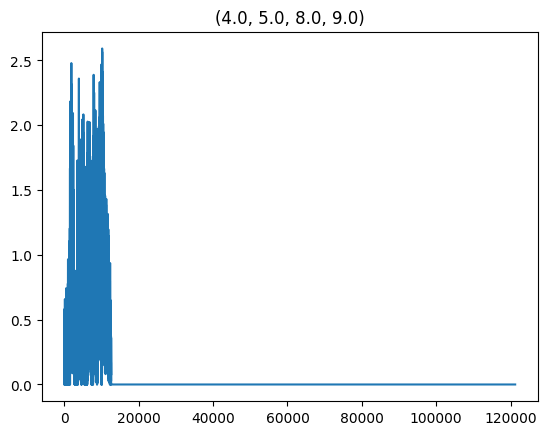

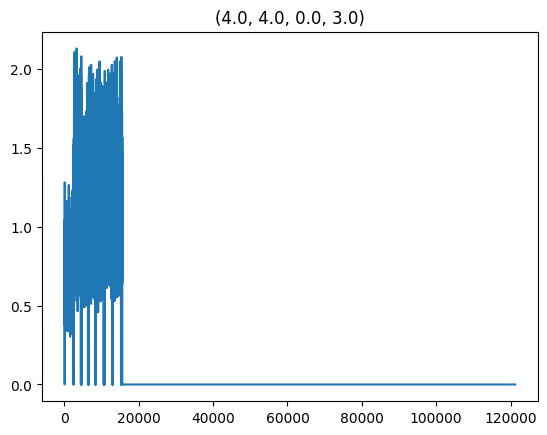

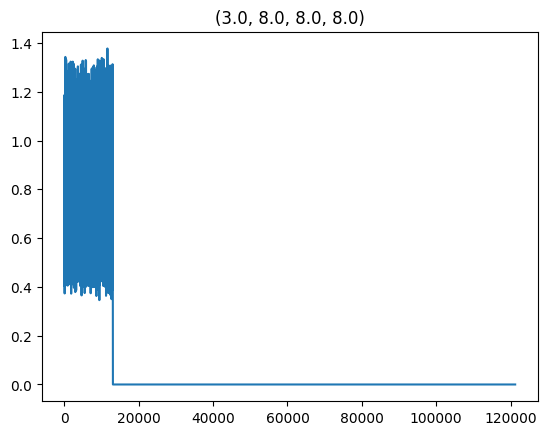

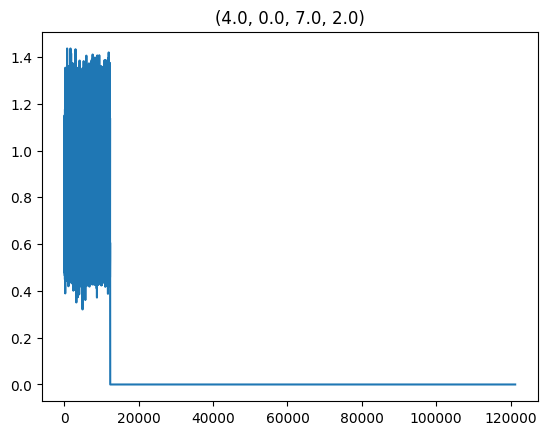

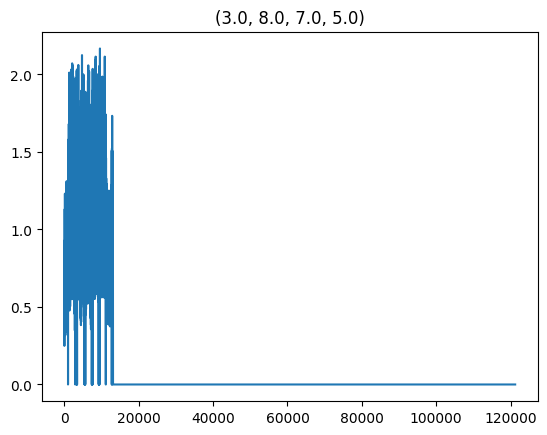

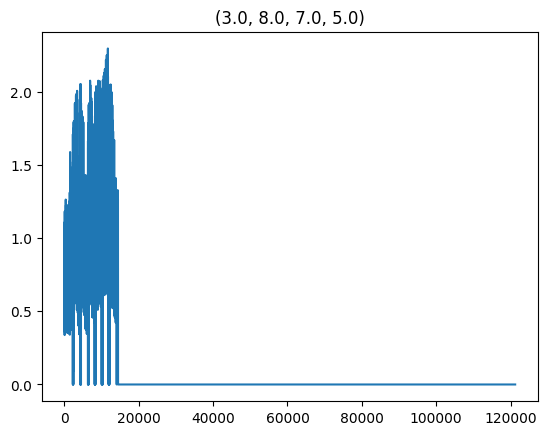

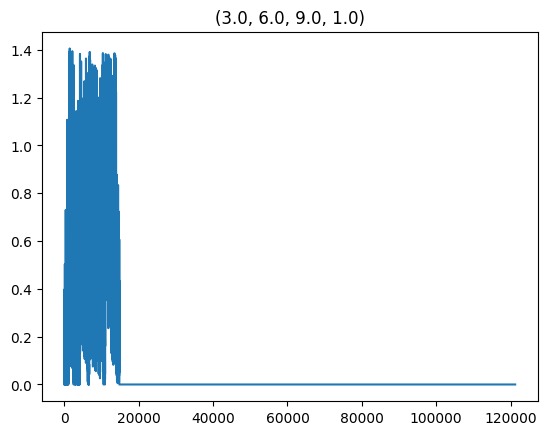

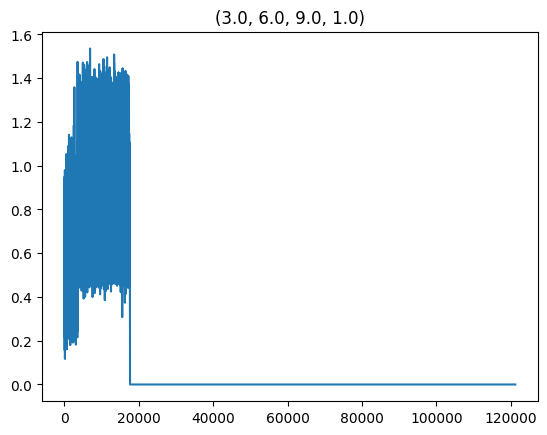

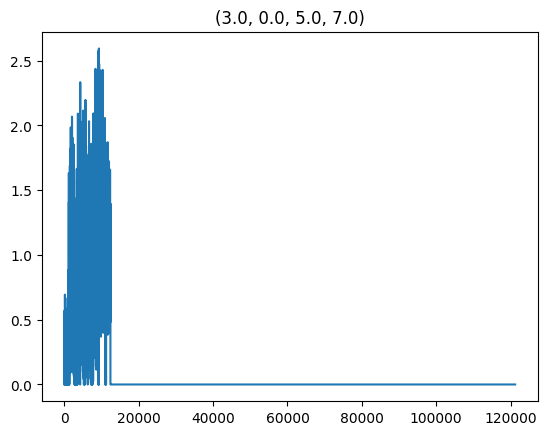

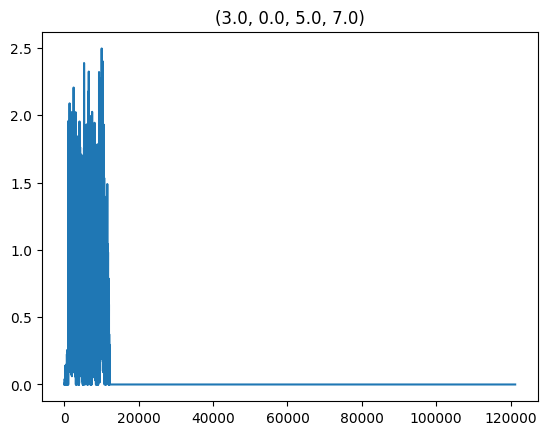

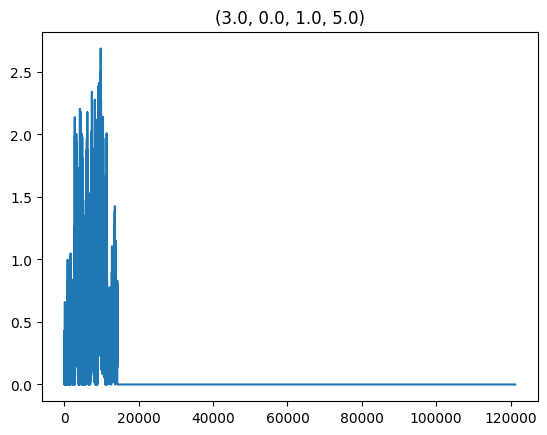

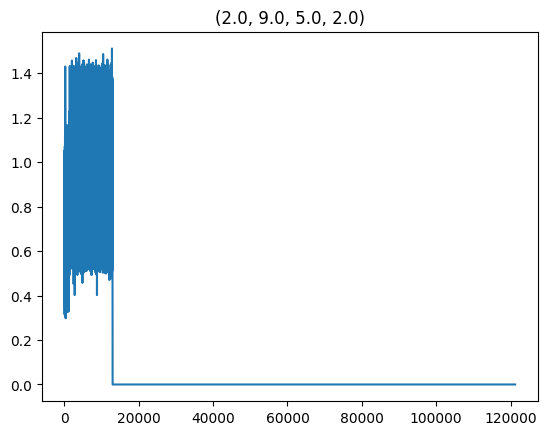

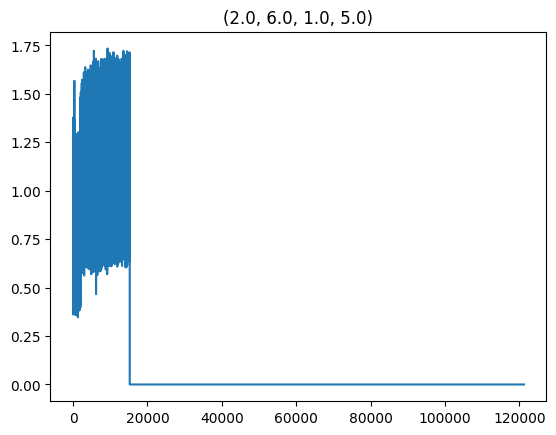

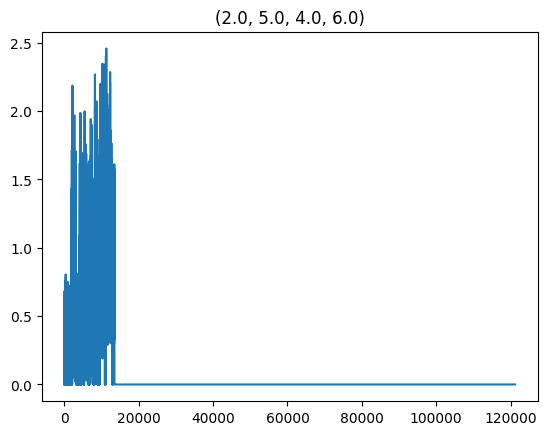

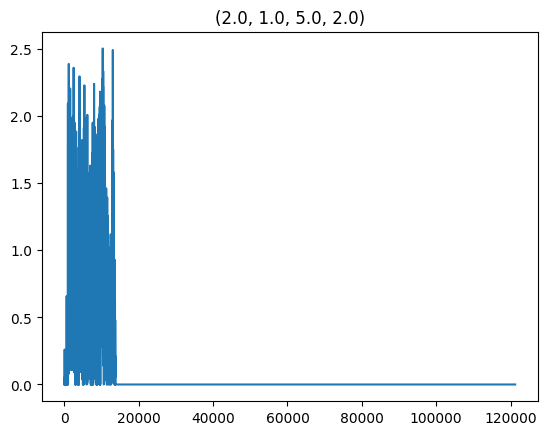

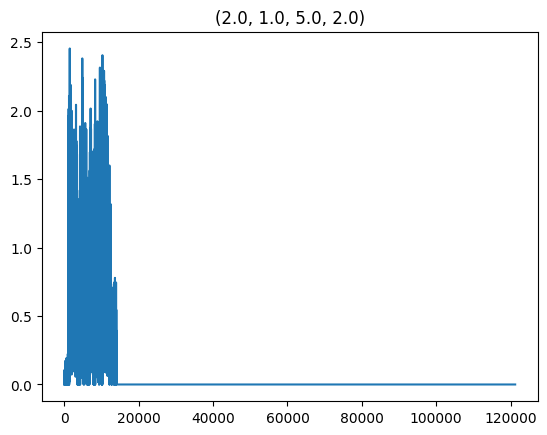

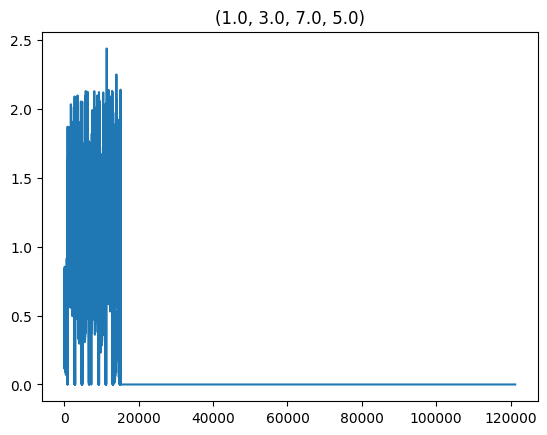

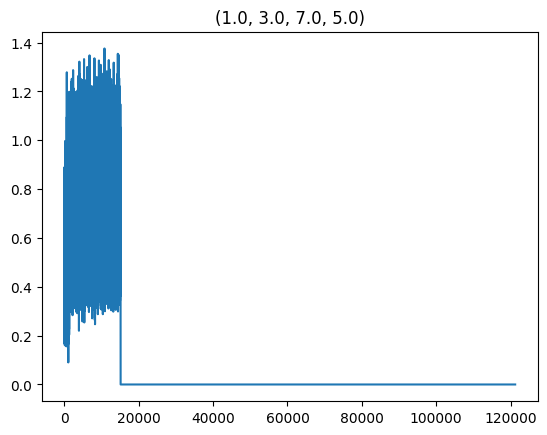

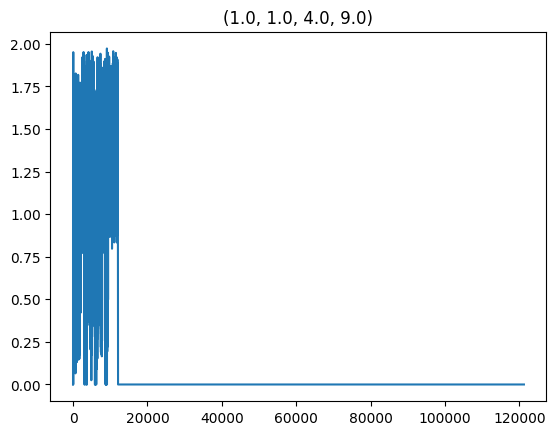

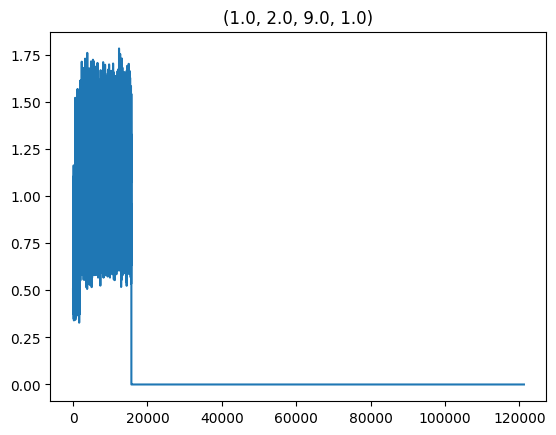

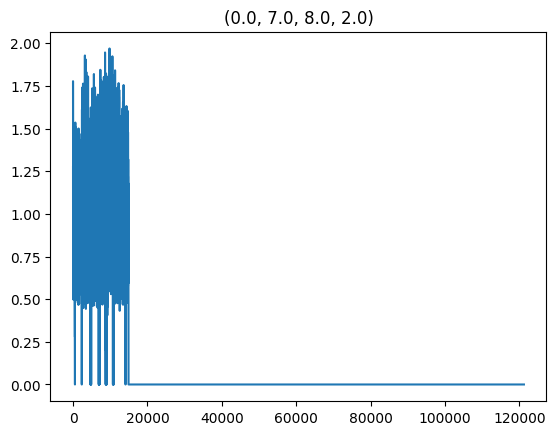

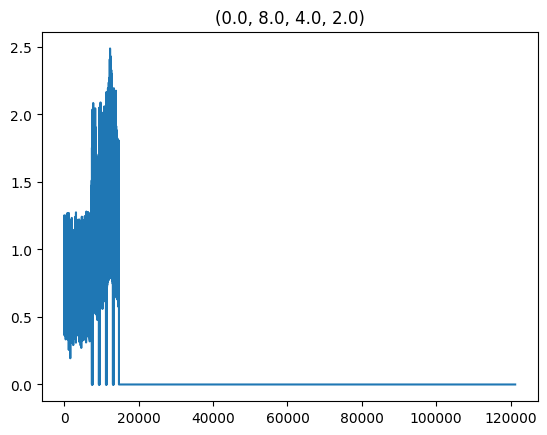

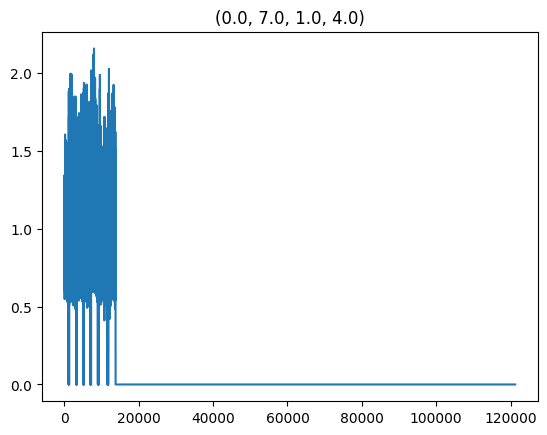

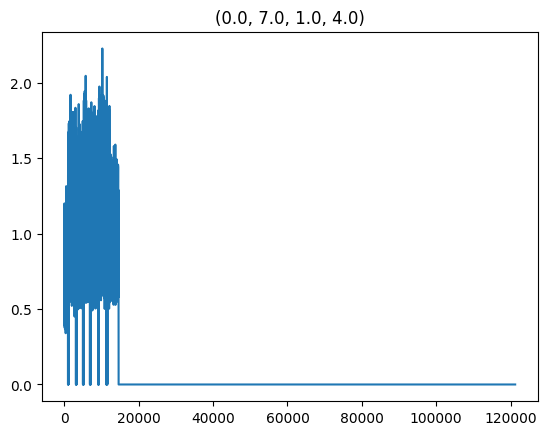

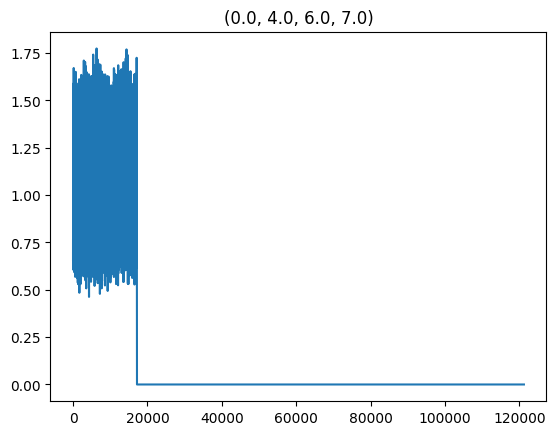

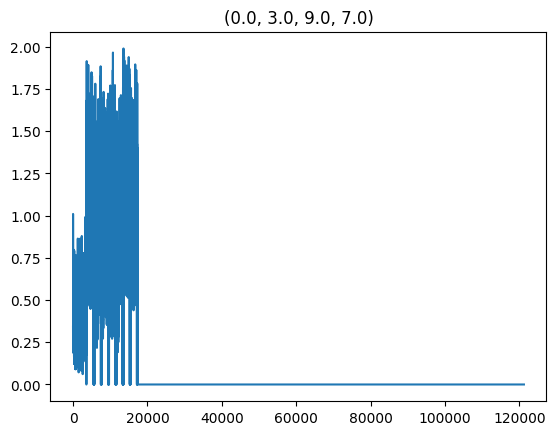

In [ ]:
from matplotlib import pyplot as plt
for i in range(0, TRAIN_SIZE, 4):
  plt.plot(range(VOLT_LEN),x_train[i])
  plt.title((y_train[0][i], y_train[1][i], y_train[2][i], y_train[3][i]))
  plt.show()


Changing the type to int may improve training speed, but floats are probably ok

In [ ]:
train_mean = np.mean(x_train)
# x_train *= 1000
# x_train = x_train.astype(int)
x_train.reshape(TRAIN_SIZE,VOLT_LEN,1)
x_train.shape


(293, 121227)

The Model:

In [ ]:
layers = [
  Input(shape=(VOLT_LEN ,1)),

  Conv1D(8,3,padding='same', input_shape=(VOLT_LEN,1)),
  Activation('relu'),
  MaxPooling1D(2, 2),

  Conv1D(16,3,padding='same', input_shape=(VOLT_LEN/2,8)),
  Activation('relu'),
  MaxPooling1D(2, 2),

  Conv1D(32, 3, padding='same', input_shape=(VOLT_LEN/4,16)),
  Activation('relu'),
  MaxPooling1D(2, 2),

  Conv1D(64, 3, padding='same', input_shape=(VOLT_LEN/8,32)),
  Activation('relu'),
  MaxPooling1D(2, 2),

  Flatten(),

  # Dense(256),
  # Activation('relu'),

  Dense(128),
  Activation('relu'),

  Dense(64),
  Activation('relu'),

  Dense(32),
  Activation('relu'),

  Dense(16),
  Activation('relu'),

  # Dense(8),
  # Activation('relu'),

  Dense(10000),
  Activation('softmax')
]
model = Sequential(layers)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 121227, 8)         32        
                                                                 
 activation (Activation)     (None, 121227, 8)         0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 60613, 8)         0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 60613, 16)         400       
                                                                 
 activation_1 (Activation)   (None, 60613, 16)         0         
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 30306, 16)        0         
 1D)                                                    

Compile for single track network:

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer=keras.optimizers.Adam(learning_rate=3e-4),metrics=['sparse_categorical_accuracy'])

Alternate Model

In [ ]:
def hidden_defaults(inputs):
  x = Conv1D(8, 3,padding='same', input_shape=(VOLT_LEN,1))(inputs)
  x = Activation('relu')(x)
  x = MaxPooling1D(2, 2)(x)
  x = Conv1D(16, 50,padding='same', input_shape=(VOLT_LEN/2,8))(x)
  x = Activation('relu')(x)
  x = MaxPooling1D(2, 2)(x)
  x = Dropout(0.25)(x)
  x = Conv1D(32, 25, padding='same', input_shape=(VOLT_LEN/4,16))(x)
  x = Activation('relu')(x)
  x = MaxPooling1D(2, 2)(x)
  x = Conv1D(64, 12, padding='same', input_shape=(VOLT_LEN/8,32))(x)
  x = Activation('relu')(x)
  x = MaxPooling1D(2, 2)(x)
  x = Dropout(0.25)(x)
  x = Conv1D(128, 6, padding='same', input_shape=(VOLT_LEN/16,64))(x)
  x = Activation('relu')(x)
  x = MaxPooling1D(2, 2)(x)
  # x = Conv1D(256, 3, padding='same', input_shape=(VOLT_LEN/32,128))(x)
  # x = Activation('relu')(x)
  # x = MaxPooling1D(2, 2)(x)
  x = Flatten()(x)
  return x

def first_digit(flat):
  # x = hidden_defaults(inputs)
  # x = Flatten()(x)
  # x = Dense(160)(flat)
  # x = Activation('relu')(x)
  # x = Dropout(0.1)(x)
  x = Dense(128)(flat)
  x = Activation('relu')(x)
  x = Dense(64)(x)
  x = Activation('relu')(x)
  x = Dropout(0.25)(x)
  x = Dense(32)(x)
  x = Activation('relu')(x)
  x = Dense(10)(x)
  x = Activation('softmax', name="first")(x)
  return x

def second_digit(flat):
  # x = hidden_defaults(inputs)
  # x = Flatten()(x)
  # x = Dense(160)(flat)
  # x = Activation('relu')(x)
  # x = Dropout(0.1)(x)
  x = Dense(128)(flat)
  x = Activation('relu')(x)
  x = Dense(64)(x)
  x = Activation('relu')(x)
  x = Dropout(0.25)(x)
  x = Dense(32)(x)
  x = Activation('relu')(x)
  x = Dense(10)(x)
  x = Activation('softmax', name="second")(x)
  return x

def third_digit(flat):
  # x = hidden_defaults(inputs)
  # x = Flatten()(x)
  # x = Dense(160)(flat)
  # x = Activation('relu')(x)
  # x = Dropout(0.1)(x)
  x = Dense(128)(flat)
  x = Activation('relu')(x)
  x = Dense(64)(x)
  x = Activation('relu')(x)
  x = Dropout(0.25)(x)
  x = Dense(32)(x)
  x = Activation('relu')(x)
  x = Dense(10)(x)
  x = Activation('softmax', name="third")(x)
  return x

def fourth_digit(flat):
  # x = hidden_defaults(inputs)
  # x = Flatten()(x)
  # x = Dense(160)(flat)
  # x = Activation('relu')(x)
  # x = Dropout(0.1)(x)
  x = Dense(128)(flat)
  x = Activation('relu')(x)
  x = Dense(64)(x)
  x = Activation('relu')(x)
  x = Dropout(0.25)(x)
  x = Dense(32)(x)
  x = Activation('relu')(x)
  x = Dense(10)(x)
  x = Activation('softmax', name="fourth")(x)
  return x

inputs = Input(shape=(VOLT_LEN, 1))
flat = hidden_defaults(inputs)
first = first_digit(flat)
second = second_digit(flat)
third = third_digit(flat)
fourth = fourth_digit(flat)
outputs = [first, second, third, fourth]
model = Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 121227, 1)]  0           []                               
                                                                                                  
 conv1d_1 (Conv1D)              (None, 121227, 8)    32          ['input_2[0][0]']                
                                                                                                  
 activation_1 (Activation)      (None, 121227, 8)    0           ['conv1d_1[0][0]']               
                                                                                                  
 max_pooling1d_1 (MaxPooling1D)  (None, 60613, 8)    0           ['activation_1[0][0]']           
                                                                                            

Compile for four track network:

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=3e-4), loss={'first':'sparse_categorical_crossentropy', 'second':'sparse_categorical_crossentropy', 'third':'sparse_categorical_crossentropy', 'fourth':'sparse_categorical_crossentropy'}, loss_weights={'first':1., 'second':1., 'third':2., 'fourth':1.,}, metrics={'first':'sparse_categorical_accuracy', 'second':'sparse_categorical_accuracy', 'third':'sparse_categorical_accuracy', 'fourth':'sparse_categorical_accuracy'})

Do a run without any training to get a baseline

In [ ]:
results = model.evaluate(x_train,y_train,verbose=0)
# print('Training Accuracy: %.2f %%'%(results[1]*100))
print("train accuracy:")
print("1: %.2f %%"%(results[5]*100))
print("2: %.2f %%"%(results[6]*100))
print("3: %.2f %%"%(results[7]*100))
print("4: %.2f %%"%(results[8]*100))

print("")

results = model.evaluate(x_test,y_test,verbose=0)
# print('Testing Accuracy: %.2f %%'%(results[1]*100))
print("test accuracy:")
print("1: %.2f %%"%(results[5]*100))
print("2: %.2f %%"%(results[6]*100))
print("3: %.2f %%"%(results[7]*100))
print("4: %.2f %%"%(results[8]*100))

train accuracy:
1: 7.17 %
2: 5.12 %
3: 6.48 %
4: 7.17 %

test accuracy:
1: 0.00 %
2: 0.00 %
3: 0.00 %
4: 0.00 %


Train the model

In [ ]:
history = model.fit(x_train,y_train,
          shuffle=True,
          epochs=30,
          batch_size=60,
          validation_split=0.2)

Epoch 1/30
4/4 [==============================] - 18s 3s/step - loss: 11.7324 - first_loss: 2.2356 - second_loss: 2.3379 - third_loss: 2.3950 - fourth_loss: 2.3689 - first_sparse_categorical_accuracy: 0.1838 - second_sparse_categorical_accuracy: 0.1538 - third_sparse_categorical_accuracy: 0.1111 - fourth_sparse_categorical_accuracy: 0.1709 - val_loss: 11.9943 - val_first_loss: 2.6290 - val_second_loss: 2.3600 - val_third_loss: 2.3487 - val_fourth_loss: 2.3080 - val_first_sparse_categorical_accuracy: 0.0000e+00 - val_second_sparse_categorical_accuracy: 0.0339 - val_third_sparse_categorical_accuracy: 0.1864 - val_fourth_sparse_categorical_accuracy: 0.0000e+00
Epoch 2/30
4/4 [==============================] - 2s 502ms/step - loss: 11.0774 - first_loss: 2.1122 - second_loss: 2.1936 - third_loss: 2.2754 - fourth_loss: 2.2208 - first_sparse_categorical_accuracy: 0.2521 - second_sparse_categorical_accuracy: 0.2436 - third_sparse_categorical_accuracy: 0.1026 - fourth_sparse_categorical_accurac

Show the loss and accuracy over time

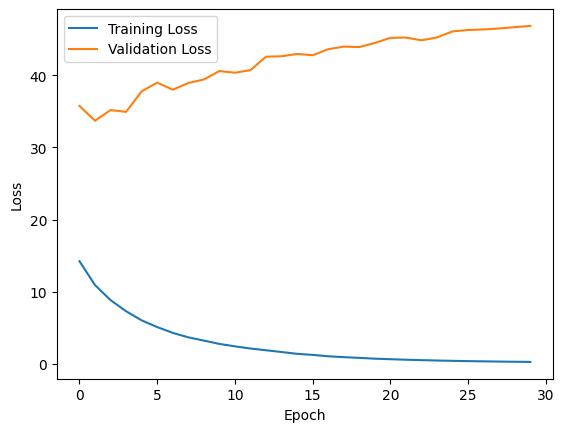

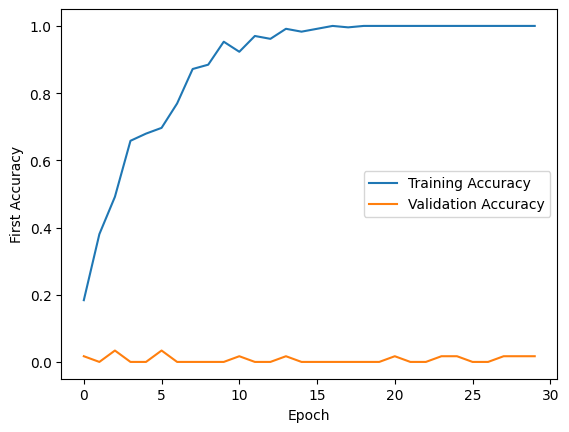

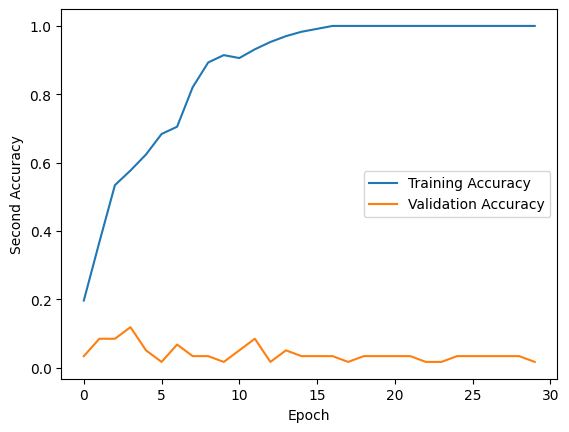

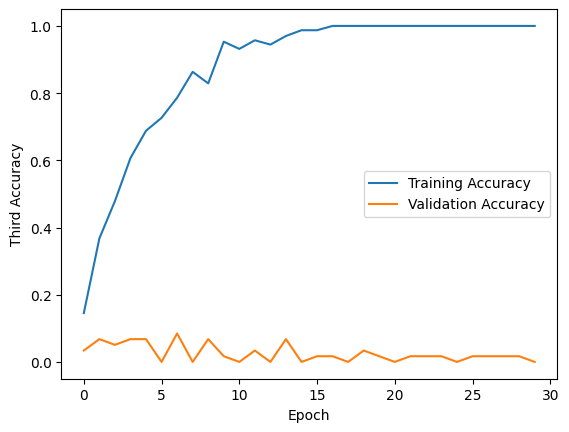

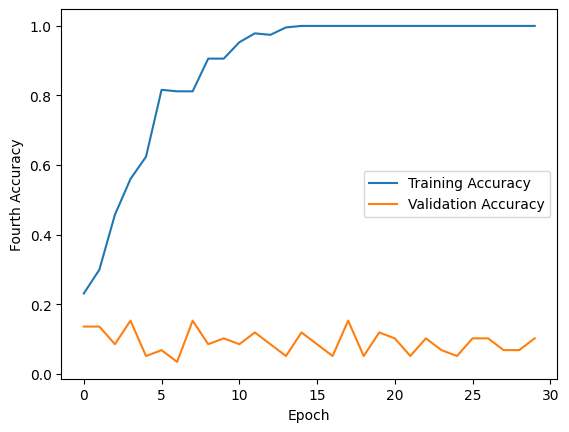

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training Loss','Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

plt.plot(history.history['first_sparse_categorical_accuracy'])
plt.plot(history.history['val_first_sparse_categorical_accuracy'])
plt.legend(['Training Accuracy','Validation Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('First Accuracy')
plt.show()

plt.plot(history.history['second_sparse_categorical_accuracy'])
plt.plot(history.history['val_second_sparse_categorical_accuracy'])
plt.legend(['Training Accuracy','Validation Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Second Accuracy')
plt.show()

plt.plot(history.history['third_sparse_categorical_accuracy'])
plt.plot(history.history['val_third_sparse_categorical_accuracy'])
plt.legend(['Training Accuracy','Validation Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Third Accuracy')
plt.show()

plt.plot(history.history['fourth_sparse_categorical_accuracy'])
plt.plot(history.history['val_fourth_sparse_categorical_accuracy'])
plt.legend(['Training Accuracy','Validation Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Fourth Accuracy')
plt.show()

Run the test data through the network to get the testing accuracy

In [ ]:
results = model.evaluate(x_train,y_train,verbose=0)
# print('Training Accuracy: %.2f %%'%(results[1]*100))
print("train accuracy:")
print("1: %.2f %%"%(results[5]*100))
print("2: %.2f %%"%(results[6]*100))
print("3: %.2f %%"%(results[7]*100))
print("4: %.2f %%"%(results[8]*100))

print("")

results = model.evaluate(x_test,y_test,verbose=0)
# print('Testing Accuracy: %.2f %%'%(results[1]*100))
print("test accuracy:")
print("1: %.2f %%"%(results[5]*100))
print("2: %.2f %%"%(results[6]*100))
print("3: %.2f %%"%(results[7]*100))
print("4: %.2f %%"%(results[8]*100))

train accuracy:
1: 80.20 %
2: 80.20 %
3: 79.86 %
4: 81.91 %

test accuracy:
1: 25.37 %
2: 22.39 %
3: 26.87 %
4: 26.87 %


Show some test data along with its predicted label and actual label

In [ ]:
unique, counts = np.unique(y_train[0], return_counts=True)
pprint(dict(zip(unique, counts)))
print("")
unique, counts = np.unique(y_train[1], return_counts=True)
pprint(dict(zip(unique, counts)))
print("")
unique, counts = np.unique(y_train[2], return_counts=True)
pprint(dict(zip(unique, counts)))
print("")
unique, counts = np.unique(y_train[3], return_counts=True)
pprint(dict(zip(unique, counts)))
print("")

{0.0: 24,
 1.0: 24,
 2.0: 28,
 3.0: 28,
 4.0: 25,
 5.0: 29,
 6.0: 61,
 7.0: 16,
 8.0: 37,
 9.0: 21}

{0.0: 36,
 1.0: 20,
 2.0: 12,
 3.0: 37,
 4.0: 25,
 5.0: 42,
 6.0: 53,
 7.0: 24,
 8.0: 24,
 9.0: 20}

{0.0: 28,
 1.0: 41,
 2.0: 16,
 3.0: 41,
 4.0: 37,
 5.0: 32,
 6.0: 8,
 7.0: 29,
 8.0: 33,
 9.0: 28}

{0.0: 38,
 1.0: 28,
 2.0: 44,
 3.0: 16,
 4.0: 21,
 5.0: 28,
 6.0: 21,
 7.0: 32,
 8.0: 28,
 9.0: 37}



In [ ]:
preds = model.predict(x_test,verbose=0)

correct = 0
print("Pred | Real")

for i in range(TEST_SIZE):
  pred = ""
  real = ""
  pred += str(np.argmax(preds[0][i]))
  pred += str(np.argmax(preds[1][i]))
  pred += str(np.argmax(preds[2][i]))
  pred += str(np.argmax(preds[3][i]))

  print(pred, end=' ')
  print("|", end=' ')
  real += str(int(y_test[0][i]))
  real += str(int(y_test[1][i]))
  real += str(int(y_test[2][i]))
  real += str(int(y_test[3][i]))
  print(real, end=' ')
  if pred == real:
    print("CORRECT")
    correct += 1
  else:
    print("")
    p1 = [(i,v) for i,v in  enumerate(preds[0][i])]
    p1.sort(key=lambda x: x[1], reverse = True)
    pprint(p1[:3])
    p2 = [(i,v) for i,v in  enumerate(preds[1][i])]
    p2.sort(key=lambda x: x[1], reverse = True)
    pprint(p2[:3])
    p3 = [(i,v) for i,v in  enumerate(preds[2][i])]
    p3.sort(key=lambda x: x[1], reverse = True)
    pprint(p3[:3])
    p4 = [(i,v) for i,v in  enumerate(preds[3][i])]
    p4.sort(key=lambda x: x[1], reverse = True)
    pprint(p4[:3])

  print("")
print(correct)

Pred | Real
6632 | 1291 
[(6, 0.5227321), (4, 0.1565935), (8, 0.107056044)]
[(6, 0.39441362), (0, 0.38709924), (4, 0.04544822)]
[(3, 0.44827378), (1, 0.24048492), (8, 0.108705245)]
[(2, 0.35909027), (8, 0.16034183), (7, 0.10263956)]

6632 | 0842 
[(6, 0.8566365), (3, 0.04305145), (5, 0.038741488)]
[(6, 0.4268258), (0, 0.32509896), (8, 0.18635988)]
[(3, 0.6126935), (8, 0.15894212), (1, 0.10255602)]
[(2, 0.6176265), (8, 0.18423767), (1, 0.089977786)]

6038 | 1149 
[(6, 0.74623376), (3, 0.16278778), (5, 0.03746728)]
[(0, 0.8767352), (6, 0.05159266), (8, 0.04213656)]
[(3, 0.37843367), (8, 0.27322075), (9, 0.10481734)]
[(8, 0.7840225), (2, 0.09070181), (7, 0.03735309)]

3839 | 0467 
[(3, 0.4938294), (8, 0.2115064), (6, 0.13282885)]
[(8, 0.8030549), (6, 0.09399629), (0, 0.06450219)]
[(3, 0.46733254), (8, 0.17982073), (7, 0.10416044)]
[(9, 0.29707363), (8, 0.26624855), (2, 0.15452921)]

6017 | 0559 
[(6, 0.25365344), (8, 0.22933705), (4, 0.18330638)]
[(0, 0.29977208), (6, 0.25937578), (4, 0.0

Code for demo

In [ ]:
DEMO_PATH = '/content/gdrive/MyDrive/sp/test_data/demo/'

VOLT_LEN = 121227

TEST_SIZE = 1

trace_num = 0
x_test = np.zeros((TEST_SIZE, VOLT_LEN))
y_test = np.zeros(TEST_SIZE)

for volt_trace in os.listdir(DEMO_PATH):
  with open(DEMO_PATH + volt_trace,'r') as f:
    data = f.readlines()
  data = np.array([list(map(float, x.strip().split())) for x in data])
  for i in range(len(data)):
    if i == 0:
      continue
    x_test[0][i - 1] = float(data[i][1])
  y_test[0] = data[0][0]
  trace_num += 1

x_test = np.array(x_test)
x_test, y_test

y_temp = np.zeros((TEST_SIZE, 4))
for i in range(len(y_test)):
  temp = list(str(int(y_test[i])))
  if len(temp) == 3:
    temp = [0] + temp
  elif len(temp) == 2:
    temp = [0, 0] + temp
  elif len(temp) == 1:
    temp = [0, 0, 0] + temp
  y_temp[i] = temp
  for j in range(len(y_temp[i])):
    y_temp[i][j] = int(y_temp[i][j])
y_test = y_temp

print(y_test)

y_1 = np.zeros(TEST_SIZE)
y_2 = np.zeros(TEST_SIZE)
y_3 = np.zeros(TEST_SIZE)
y_4 = np.zeros(TEST_SIZE)
for i in range(TEST_SIZE):
  y_1[i] = y_test[i][0]
  y_2[i] = y_test[i][1]
  y_3[i] = y_test[i][2]
  y_4[i] = y_test[i][3]

y_test = [y_1, y_2, y_3, y_4]

preds = model.predict(x_test,verbose=0)

correct = 0
print("Pred | Real")

for i in range(TEST_SIZE):
  pred = ""
  real = ""
  pred += str(np.argmax(preds[0][i]))
  pred += str(np.argmax(preds[1][i]))
  pred += str(np.argmax(preds[2][i]))
  pred += str(np.argmax(preds[3][i]))

  print(pred, end=' ')
  print("|", end=' ')
  real += str(int(y_test[0][i]))
  real += str(int(y_test[1][i]))
  real += str(int(y_test[2][i]))
  real += str(int(y_test[3][i]))
  print(real, end=' ')
  if pred == real:
    print("CORRECT")
    correct += 1
  else:
    print("")
    p1 = [(i,v) for i,v in  enumerate(preds[0][i])]
    p1.sort(key=lambda x: x[1], reverse = True)
    pprint(p1[:3])
    p2 = [(i,v) for i,v in  enumerate(preds[1][i])]
    p2.sort(key=lambda x: x[1], reverse = True)
    pprint(p2[:3])
    p3 = [(i,v) for i,v in  enumerate(preds[2][i])]
    p3.sort(key=lambda x: x[1], reverse = True)
    pprint(p3[:3])
    p4 = [(i,v) for i,v in  enumerate(preds[3][i])]
    p4.sort(key=lambda x: x[1], reverse = True)
    pprint(p4[:3])

  print("")
print(correct)


[[6. 7. 4. 3.]]
Pred | Real
8218 | 6743 
[(8, 0.26811355), (4, 0.2418969), (7, 0.21977285)]
[(2, 0.20672323), (1, 0.18883123), (3, 0.12624618)]
[(1, 0.17853725), (3, 0.12902), (8, 0.112919256)]
[(8, 0.24120718), (3, 0.17072901), (9, 0.15656716)]

0


<ipython-input-59-ff940bd04231>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([list(map(float, x.strip().split())) for x in data])
